In [45]:
# pandas/numpy for handling data
import pandas as pd
import numpy as np

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scikit_posthocs as sp

---
&nbsp; 

...

&nbsp; 

---

In [5]:
# setting a global darkgrid style w/ dark edge plot elements for plotting

sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Analyzing telomeric aberrations
---

## Reading in telomeric aberration data (inflight astros)

In [6]:
melt_all_astro_telo_aberr = pd.read_csv('../data/compiled and processed data/melt_all_astro_telo_aberr.csv')
melt_all_astro_telo_aberr['astro id'] = melt_all_astro_telo_aberr['astro id'].astype('str')

In [7]:
melt_all_astro_telo_aberr.head(4)

,astro id,flight status,aberration type,count per cell
0,2171.0,pre-flight,# of Fragile Telos,1.0
1,2171.0,pre-flight,# of Fragile Telos,1.0
2,2171.0,pre-flight,# of Fragile Telos,0.0
3,2171.0,pre-flight,# of Fragile Telos,2.0


## Graphing telomeric aberrations (inflight astros)

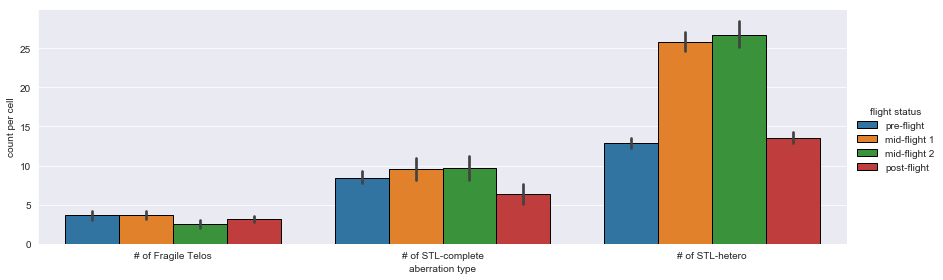

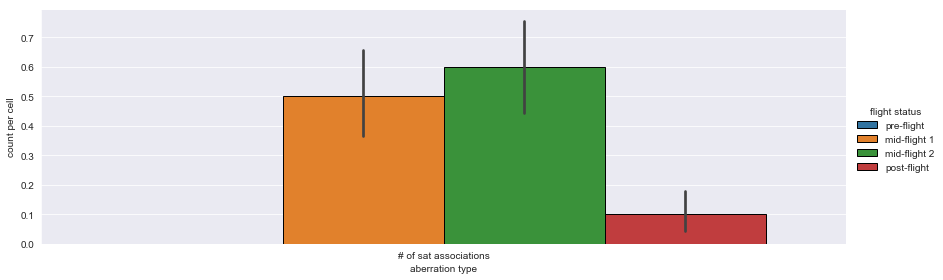

In [8]:
# let's make two graphs, one w/o and one w/ satellite associations

data=melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] != '# of sat associations']
data2=melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] == '# of sat associations']

x='aberration type'
y='count per cell'
hue='flight status'

ax1= sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar', height=4, aspect=3)

ax2= sns.catplot(x=x, y=y, data=data2, hue=hue, kind='bar', height=4, aspect=3)

No trend in # fragile telos per spaceflight. Potential but very minor trend in STL-complete for midflight

Hetero telomeric foci @ sister chromatids highly elevated inflight, as are satellite associations..
High levels of recombination between telomeres? Let's combine mid-flight samples, just for curiosity.

In [9]:
def combine_midflight(row):
    if 'mid-flight 1' in row or 'mid-flight 2' in row:
        row = 'mid-flight'
        return row
    else:
        return row

In [11]:
mid_combined_melt_all_astro_telo_aberr = melt_all_astro_telo_aberr
mid_combined_melt_all_astro_telo_aberr['flight status new'] = (mid_combined_melt_all_astro_telo_aberr['flight status']
                                                                            .apply(lambda row: combine_midflight(row)))

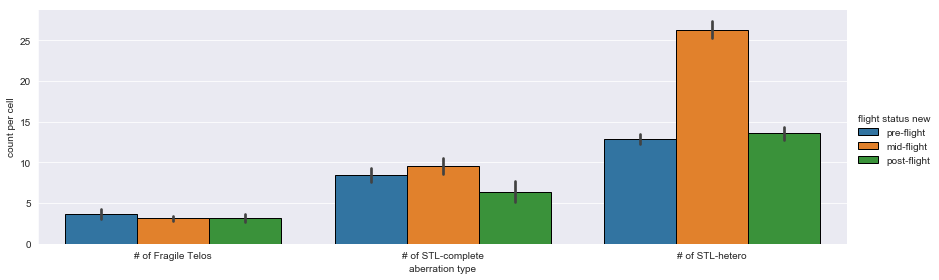

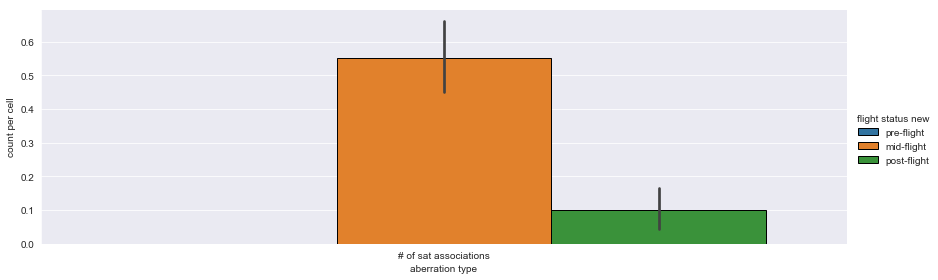

In [12]:
data=mid_combined_melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] != '# of sat associations']
data2=mid_combined_melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] == '# of sat associations']

x='aberration type'
y='count per cell'
hue='flight status new'

ax1= sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar', height=4, aspect=3)

ax2= sns.catplot(x=x, y=y, data=data2, hue=hue, kind='bar', height=4, aspect=3)

Same trends, different perspective w/ mid-flight combined. Heterogenous telomere foci between sister chromatids & satellite associations are elevated mid-flight

## Statistics: telomeric aberrations

# Analyzing chromosome rearrangement data
---

In [13]:
melt_all_astro_chr_aberr = pd.read_csv('../data/compiled and processed data/All_astronauts_chromosome_aberration_data_tidy_data.csv')

# reformatting (float -> int -> str)
melt_all_astro_chr_aberr['astro id'] = melt_all_astro_chr_aberr['astro id'].astype('int')
melt_all_astro_chr_aberr['astro id'] = melt_all_astro_chr_aberr['astro id'].astype('str')

In [14]:
melt_all_astro_chr_aberr.head(4)

,astro id,flight status,aberration type,count per cell
0,2171,pre-flight,dicentrics,0.0
1,2171,pre-flight,dicentrics,0.0
2,2171,pre-flight,dicentrics,0.0
3,2171,pre-flight,dicentrics,0.0


## Graphing chromosome rearrangements for pre, mid-flight1&2, and post-flight for all astronauts (n=11)

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, mid1/2-, post-')

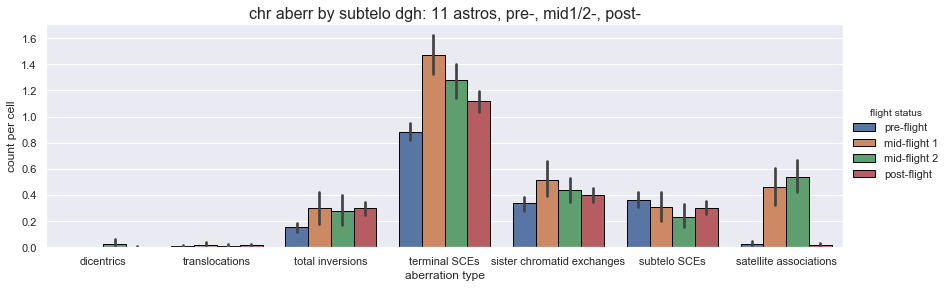

In [15]:
order_cat=['dicentrics', 'translocations', 'total inversions', 'terminal SCEs',
           'sister chromatid exchanges', 'subtelo SCEs', 'satellite associations']

ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=melt_all_astro_chr_aberr)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, mid1/2-, post-', fontsize=16)

Inversions become elevated mid-flight and remain elevated post-flight; this behavior is expected for transmissible 
rearrangements. Terminal SCEs and classic SCEs are also elevated midflight and remain elevated, though at a lesser extent,
post-flight. This suggests on-going replication stress, even months post-flight (when the samples were analyzed). Surprising.

Let's examine w/ mid-flight combined.

In [16]:
mid_combined_melt_all_astro_chr_aberr = melt_all_astro_chr_aberr

mid_combined_melt_all_astro_chr_aberr['flight status new'] = (mid_combined_melt_all_astro_chr_aberr['flight status']
                                                                            .apply(lambda row: combine_midflight(row)))

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, mid-, post-')

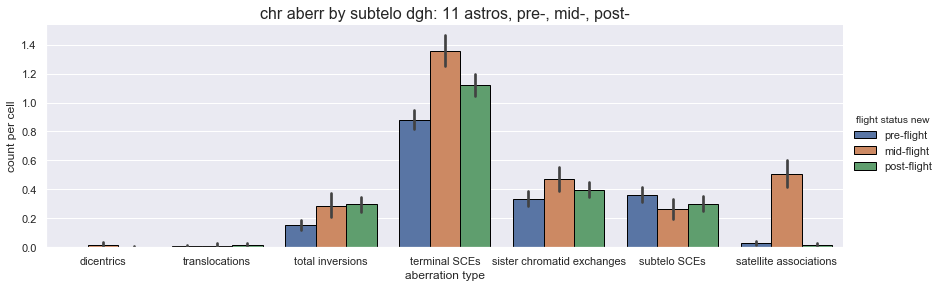

In [17]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status new', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_combined_melt_all_astro_chr_aberr)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, mid-, post-', fontsize=16)

## Statistics: chromosome rearrangements (n=11)

In [261]:
# conducting one-way ANOVA for chr rearrangements
df = mid_combined_melt_all_astro_chr_aberr
aberrations = list(df['aberration type'].unique())

In [262]:
aberr_anova_values = []

for aberr in aberrations:

    g_1 = df[(df['flight status new'] == 'pre-flight') & (df['aberration type'] == aberr)]['count per cell']
    g_2 = df[(df['flight status new'] == 'mid-flight') & (df['aberration type'] == aberr)]['count per cell']
    g_3 = df[(df['flight status new'] == 'post-flight') & (df['aberration type'] == aberr)]['count per cell']
    
    aberr_anova_values.append([aberr, stats.f_oneway(g_1, g_2, g_3)])
    print(aberr, stats.f_oneway(g_1, g_2, g_3))

dicentrics F_onewayResult(statistic=4.359495819346036, pvalue=0.013032431380046457)
translocations F_onewayResult(statistic=0.5205308788346538, pvalue=0.5943683737973546)
subtelo SCEs F_onewayResult(statistic=2.618490620523582, pvalue=0.07342033863120888)
sister chromatid exchanges F_onewayResult(statistic=3.816684392005301, pvalue=0.022326712604011)
satellite associations F_onewayResult(statistic=194.60107334204997, pvalue=5.989793836444764e-72)
total inversions F_onewayResult(statistic=10.84654224965885, pvalue=2.1904283223930188e-05)
terminal SCEs F_onewayResult(statistic=28.348568826647767, pvalue=1.070703299156238e-12)


In [263]:
for aberr_item in ['dicentrics', 'sister chromatid exchanges', 
                   'satellite associations', 'total inversions', 'terminal SCEs']:
        
    df_aberr = df[df['aberration type'] == aberr_item]
    print(aberr_item, '\n',
    sp.posthoc_ttest(df_aberr, val_col='count per cell', 
          group_col='flight status new', equal_var=False,), '\n')


dicentrics 
              pre-flight  mid-flight  post-flight
pre-flight    -1.000000    0.083260     0.317917
mid-flight     0.083260   -1.000000     0.156309
post-flight    0.317917    0.156309    -1.000000 

sister chromatid exchanges 
              pre-flight  mid-flight  post-flight
pre-flight    -1.000000    0.007759     0.113047
mid-flight     0.007759   -1.000000     0.158330
post-flight    0.113047    0.158330    -1.000000 

satellite associations 
                pre-flight    mid-flight   post-flight
pre-flight  -1.000000e+00  4.336618e-20  3.487308e-01
mid-flight   4.336618e-20 -1.000000e+00  8.698394e-21
post-flight  3.487308e-01  8.698394e-21 -1.000000e+00 

total inversions 
              pre-flight  mid-flight  post-flight
pre-flight    -1.000000    0.003588     0.000005
mid-flight     0.003588   -1.000000     0.822497
post-flight    0.000005    0.822497    -1.000000 

terminal SCEs 
                pre-flight    mid-flight  post-flight
pre-flight  -1.000000e+00  3.1756

Same results, different perspective. Let's remove the mid-flight data real quick and 
then look at just our 3 unrelated astronauts w/ inflight data

In [133]:
mid_flight_removed = mid_combined_melt_all_astro_chr_aberr[mid_combined_melt_all_astro_chr_aberr['flight status new'] != 'mid-flight']

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, post-')

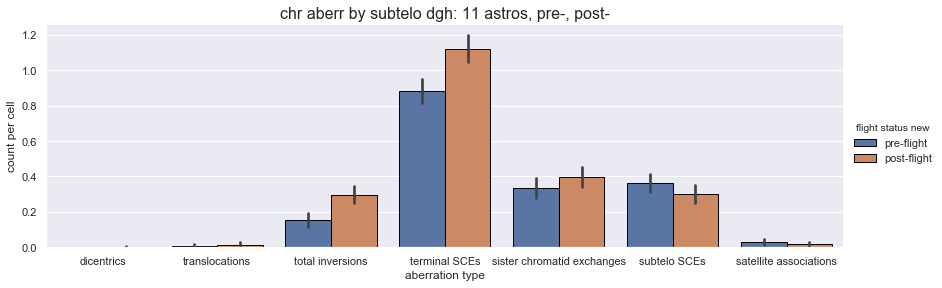

In [134]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status new', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_removed)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, post-', fontsize=16)

## Graphing chromosome rearrangements for pre, mid-flight1&2, and post-flight for all astronauts (n=3)

In [109]:
mid_combined = mid_combined_melt_all_astro_chr_aberr

mid_flight_only_astros = mid_combined[(mid_combined['astro id'] == '2171') | 
                                      (mid_combined['astro id'] == '1536') |
                                      (mid_combined['astro id'] == '5163')]

list(mid_flight_only_astros['astro id'].unique())

['2171', '5163', '1536']

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 3 astros, pre-, mid1&2-, post-')

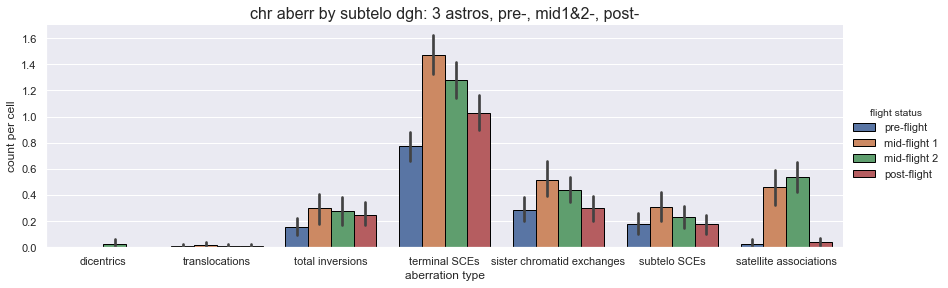

In [127]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_only_astros)

plt.title('chr aberr by subtelo dgh: 3 astros, pre-, mid1&2-, post-', fontsize=16)

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-')

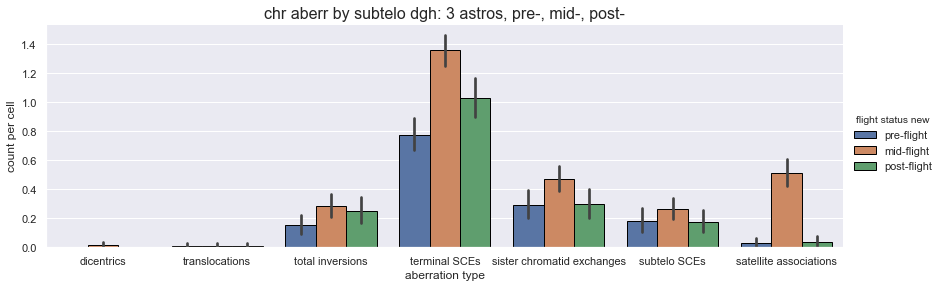

In [128]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status new', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_only_astros)

plt.title('chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-', fontsize=16)

In [25]:
grouped_mid_flight_only_astros = mid_flight_only_astros.groupby(['astro id', 'flight status', 'flight status new', 'aberration type']).agg('mean').reset_index()

In [43]:
mid_flight_only_astros.shape

(2828, 5)

## Statistics: chromosome rearrangements (n=3)

In [73]:
df.head(4)

,astro id,flight status,aberration type,count per cell,flight status new,index
0,2171,pre-flight,dicentrics,0.0,pre-flight,0
1,2171,pre-flight,dicentrics,0.0,pre-flight,1
2,2171,pre-flight,dicentrics,0.0,pre-flight,2
3,2171,pre-flight,dicentrics,0.0,pre-flight,3


In [244]:
# conducting one-way ANOVA for chr rearrangements
df = mid_flight_only_astros
aberrations = list(df['aberration type'].unique())

In [264]:
aberr_anova_values = []

for aberr in aberrations:

    g_1 = df[(df['flight status new'] == 'pre-flight') & (df['aberration type'] == aberr)]['count per cell']
    g_2 = df[(df['flight status new'] == 'mid-flight') & (df['aberration type'] == aberr)]['count per cell']
    g_3 = df[(df['flight status new'] == 'post-flight') & (df['aberration type'] == aberr)]['count per cell']
    
    aberr_anova_values.append([aberr, stats.f_oneway(g_1, g_2, g_3)])
    print(aberr, stats.f_oneway(g_1, g_2, g_3))

dicentrics F_onewayResult(statistic=4.359495819346036, pvalue=0.013032431380046457)
translocations F_onewayResult(statistic=0.5205308788346538, pvalue=0.5943683737973546)
subtelo SCEs F_onewayResult(statistic=2.618490620523582, pvalue=0.07342033863120888)
sister chromatid exchanges F_onewayResult(statistic=3.816684392005301, pvalue=0.022326712604011)
satellite associations F_onewayResult(statistic=194.60107334204997, pvalue=5.989793836444764e-72)
total inversions F_onewayResult(statistic=10.84654224965885, pvalue=2.1904283223930188e-05)
terminal SCEs F_onewayResult(statistic=28.348568826647767, pvalue=1.070703299156238e-12)


In [260]:
for aberr_item in ['sister chromatid exchanges', 'satellite associations', 'total inversions', 'terminal SCEs']:
        
    df_aberr = df[df['aberration type'] == aberr_item]
    print(aberr_item, '\n',
    sp.posthoc_ttest(df_aberr, val_col='count per cell', 
          group_col='flight status new', equal_var=False,), '\n')


sister chromatid exchanges 
              pre-flight  mid-flight  post-flight
pre-flight    -1.000000    0.005266     0.908321
mid-flight     0.005266   -1.000000     0.008434
post-flight    0.908321    0.008434    -1.000000 

satellite associations 
                pre-flight    mid-flight   post-flight
pre-flight  -1.000000e+00  2.177563e-19  6.760813e-01
mid-flight   2.177563e-19 -1.000000e+00  2.350928e-18
post-flight  6.760813e-01  2.350928e-18 -1.000000e+00 

total inversions 
              pre-flight  mid-flight  post-flight
pre-flight    -1.000000    0.017269     0.091743
mid-flight     0.017269   -1.000000     0.548192
post-flight    0.091743    0.548192    -1.000000 

terminal SCEs 
                pre-flight    mid-flight  post-flight
pre-flight  -1.000000e+00  8.923163e-13     0.006061
mid-flight   8.923163e-13 -1.000000e+00     0.000266
post-flight  6.060696e-03  2.655030e-04    -1.000000 

